In [ ]:
library(tidyverse)

In [ ]:
micase = read.csv('Like csvs - MICASE exp.csv')

In [ ]:
parts_totals <- unique(micase[,c('Conv_ID','participant','age','date','total','likes')])

In [ ]:
parts_totals<- parts_totals%>% mutate(per_thou = (likes/total)*1000)

In [ ]:
parts_totals<- parts_totals%>% group_by(age)

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


NULL

geom_smooth: na.rm = FALSE, orientation = NA, se = TRUE
stat_smooth: na.rm = FALSE, orientation = NA, se = TRUE
position_identity 

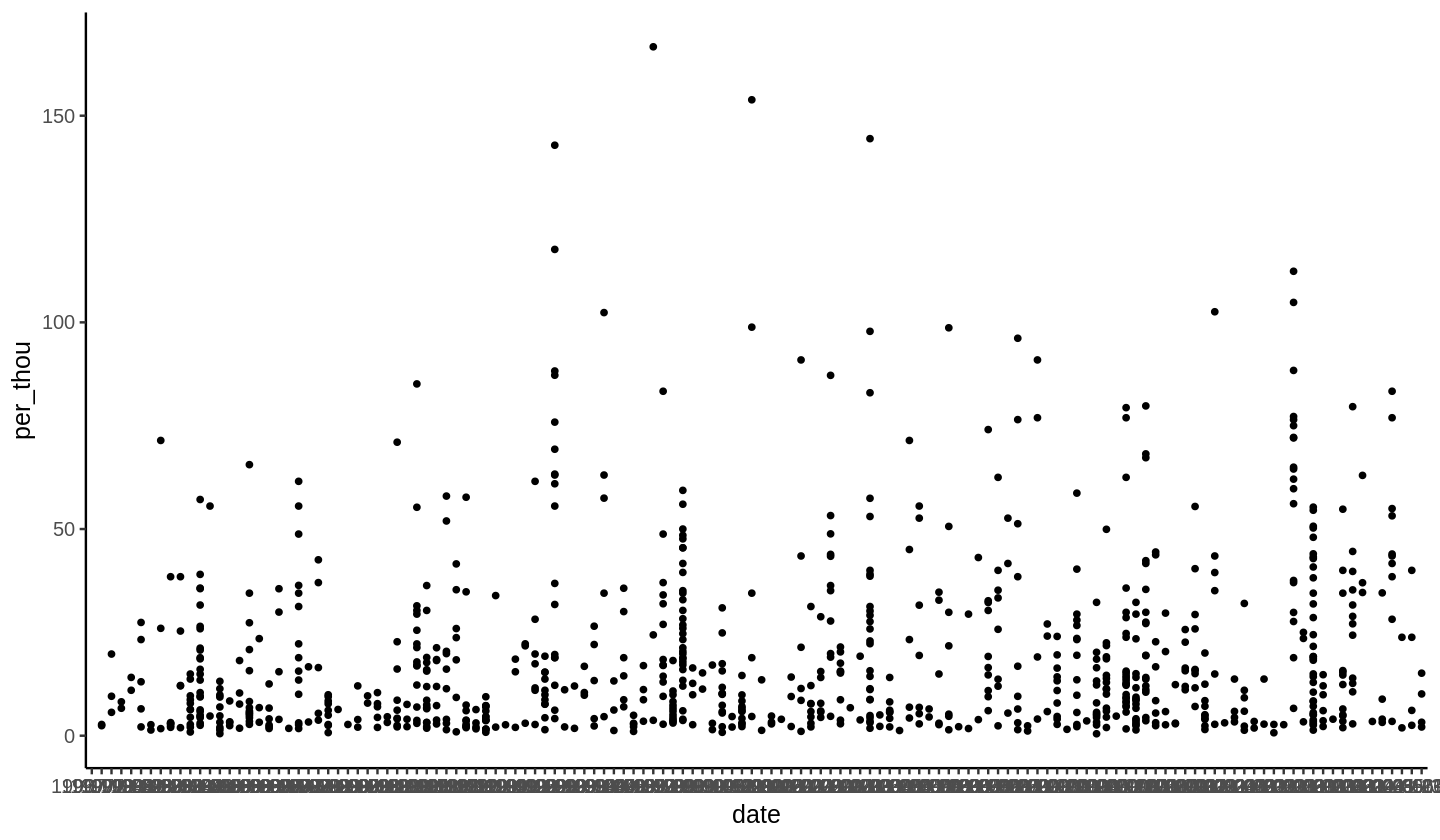

In [ ]:
ggplot(parts_totals,aes(x=date,y=per_thou))+
  geom_point()
  labs(x = "date", y= "likes per thousand words", title ="Likes per thou by age")+
  stat_smooth(method=lm)
  geom_smooth()

In [ ]:
gens <- read.csv('Like csvs - tabed_mic.csv')
gens <- unique(gens)

,Transcript.ID,transcript.id,Speaker.ID,Speaker.gender,Speaker.role,Speaker.native.speaker.status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ADV700JU023,adv700ju023,S1,F,ST,NRN
2,ADV700JU023,adv700ju023,S1,F,ST,NRN
3,ADV700JU023,adv700ju023,S1,F,ST,NRN
4,ADV700JU023,adv700ju023,S1,F,ST,NRN
5,ADV700JU023,adv700ju023,S1,F,ST,NRN
6,ADV700JU023,adv700ju023,S1,F,ST,NRN


,Transcript.ID,transcript.id,Speaker.ID,Speaker.gender,Speaker.role,Speaker.native.speaker.status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ADV700JU023,adv700ju023,S1,F,ST,NRN
25,ADV700JU023,adv700ju023,S2,F,JU,NS
58,ADV700JU023,adv700ju023,S3,F,JU,NS
121,ADV700JU023,adv700ju023,S4,F,JU,NS
129,ADV700JU047,adv700ju047,S1,M,JU,NRN
199,ADV700JU047,adv700ju047,S2,F,ST,NS


In [ ]:
by_part<- data.frame(right_join(parts_totals,gens,by =c('Conv_ID'='transcript.id','participant'='Speaker.ID') ))%>%
  subset(select = -c(Speaker.role,date,Transcript.ID,Speaker.native.speaker.status))

In [ ]:
by_part<- by_part%>% mutate(year = substr(date,0,4))%>%
  mutate(ID = row_number())

,Conv_ID,participant,age,date,total,likes,per_thou,Transcript.ID,Speaker.gender,Speaker.role,Speaker.native.speaker.status,year,ID
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,adv700ju023,S1,60,1998-07-07,6848,27,3.942757,ADV700JU023,F,ST,NRN,1998,1
2,adv700ju023,S2,20,1998-07-07,1070,32,29.906542,ADV700JU023,F,JU,NS,1998,2
3,adv700ju023,S3,20,1998-07-07,1772,63,35.553047,ADV700JU023,F,JU,NS,1998,3
4,adv700ju023,S4,20,1998-07-07,517,8,15.473888,ADV700JU023,F,JU,NS,1998,4
5,adv700ju047,S1,20,1998-11-12,2739,71,25.921869,ADV700JU047,M,JU,NRN,1998,5
6,adv700ju047,S2,36,1998-11-12,20641,191,9.253428,ADV700JU047,F,ST,NS,1998,6


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.3”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 27.3”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.0582e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 256”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.3”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborh

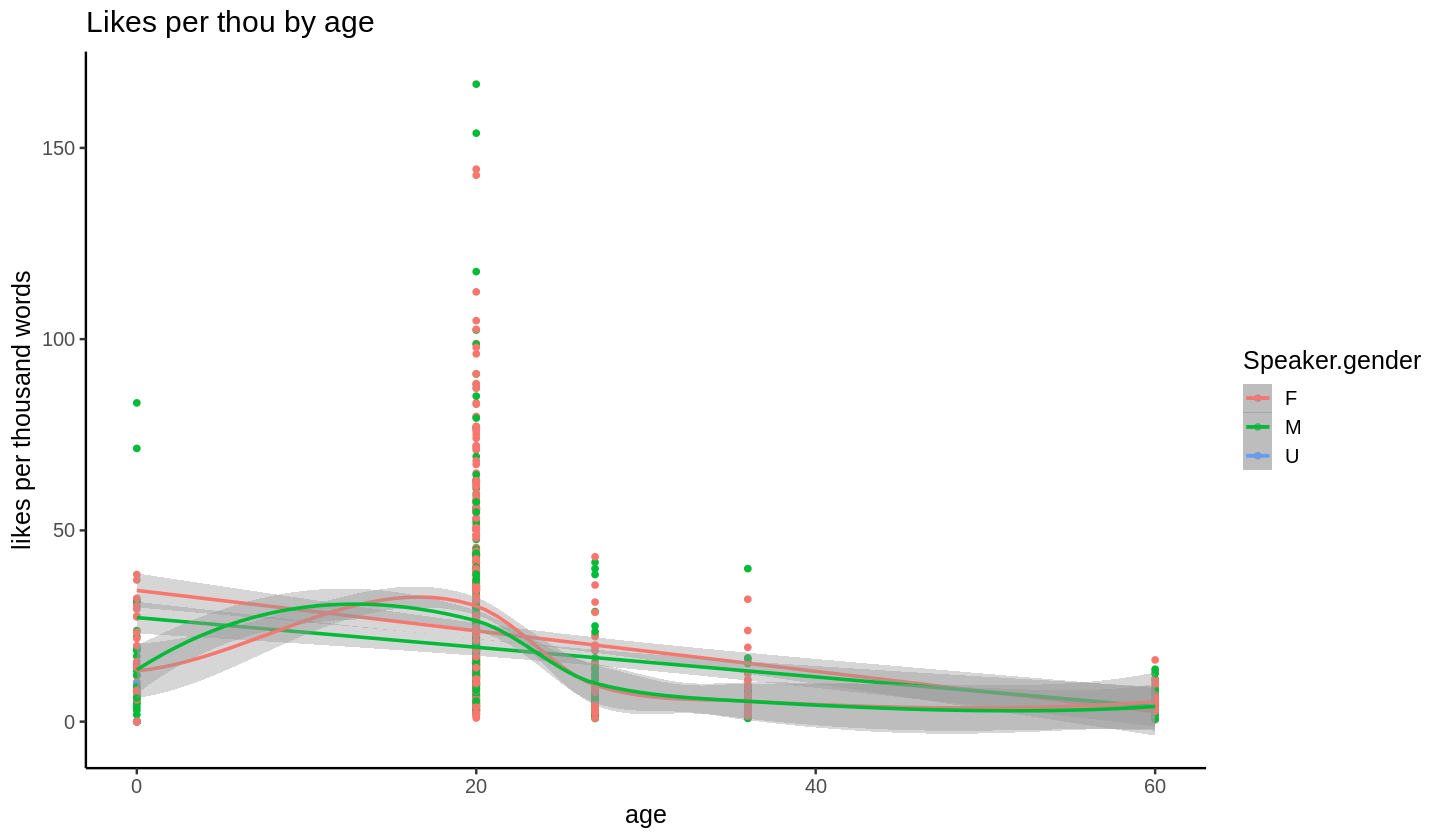

In [ ]:
theme_set(theme_classic(base_size = 15))
options(repr.plot.height = 7, repr.plot.width = 12)
ggplot(by_part,aes(x=age,y=per_thou,color = Speaker.gender))+
  geom_point()+
  labs(x = "age", y= "likes per thousand words", title ="Likes per thou by age")+
  stat_smooth(method=lm)+
  geom_smooth()



Warning message:
“Removed 18 rows containing non-finite values (`stat_boxplot()`).”


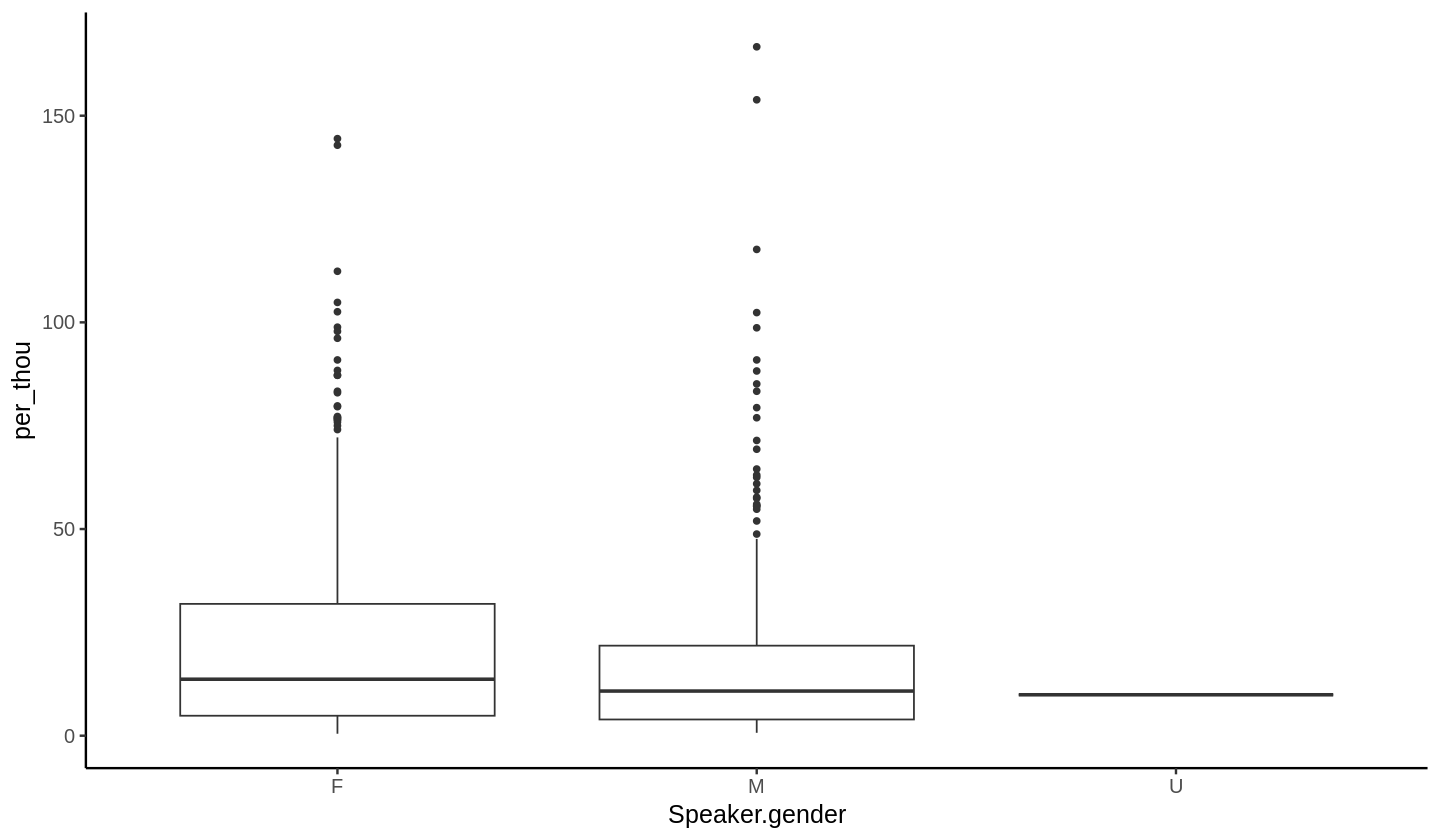

In [ ]:
ggplot(by_part,aes(x=Speaker.gender,y=per_thou))+
geom_boxplot()

In [ ]:
everything <- data.frame(right_join(micase,by_part,by =c('Conv_ID'='Conv_ID','participant'='participant','date'='date','age'='age','total'='total','likes'='likes') ))

In [ ]:
dm_calc <- everything%>% subset( select = c(ID,Conv_ID, participant,DM,year,Speaker.gender,total,likes,per_thou))
  

In [ ]:
count_frame <- count(dm_calc,ID) 
dm_calcr<-right_join(dm_calc,count_frame,by = "ID")
part_DMs <- 
  group_by(dm_calcr,ID)%>%
  count(DM)%>%
  pivot_wider(names_from=DM,values_from=n)%>%
  select(ID:nc)


ID,cm,v,x,cf,ci,nc
<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,20,1,NA,NA,NA
2,16,1,NA,2,5,8
3,50,8,NA,1,4,NA
4,5,3,NA,NA,NA,NA
5,43,9,NA,6,1,12
6,116,60,1,4,8,2


In [ ]:
by_part <- by_part%>% right_join(part_DMs, by = "ID")

In [ ]:
by_part <- by_part %>% replace(is.na(.), 0)%>%
  filter(year != "0")


In [ ]:
cm_counter <- count(dm_calc,year) 
dm_calct<-data.frame(right_join(dm_calc,cm_counter,by = "year"))
year_dm_count <- data.frame(
  group_by(dm_calct,year)%>%
  count(DM)%>%
  pivot_wider(names_from=DM,values_from=n)%>%
  select(year:cf))
  #mutate(total = SUM(cm,v,x,ci,nc))
year_dm_count<- year_dm_count%>% replace(is.na(.), 0)
year_dm_count<- year_dm_count %>%
  mutate(sum = rowSums(across(where(is.numeric)), na.rm=TRUE))%>%
  rename("total_like_year" = "sum")


,year,cm,v,x,ci,nc,cf,total_like_year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1996,8,5,1,0,0,0,14
2,1997,97,45,0,6,7,0,155
3,1998,2104,775,86,162,178,33,3338
4,1999,1435,425,159,101,108,11,2239
5,2000,3824,995,106,320,270,76,5591
6,2001,2187,395,52,118,161,49,2962


In [ ]:
by_year <- data.frame(pivot_wider(by_part,names_from =year,values_from = total))
by_year<- subset(by_year,select = c(ID,X1996,X1997,X1998,X1999,X2000,X2001))
by_year<- by_year%>% replace(is.na(.), 0)
x96 <- sum(by_year$X1996)
x97 <- sum(by_year$X1997)
x98 <- sum(by_year$X1998)
x99 <- sum(by_year$X1999)
x00 <- sum(by_year$X2000)
x01 <- sum(by_year$X2001)
year_total <- c(x96,x97,x98,x99,x00,x01,0)


,ID,X1996,X1997,X1998,X1999,X2000,X2001
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,6848,0,0,0
2,2,0,0,1070,0,0,0
3,3,0,0,1772,0,0,0
4,4,0,0,517,0,0,0
5,5,0,0,2739,0,0,0
6,6,0,0,20641,0,0,0


[1]   5424  17683 499238 392396 629837 252887      0

In [ ]:
year_dm_count <- year_dm_count%>% cbind(year_total)

In [ ]:
year_dm_count$cm[7] <- sum(year_dm_count$cm)
year_dm_count$ci[7] <- sum(year_dm_count$ci)
year_dm_count$cf[7] <- sum(year_dm_count$cf)
year_dm_count$nc[7] <- sum(year_dm_count$nc)
year_dm_count$x[7] <- sum(year_dm_count$x)
year_dm_count$v[7] <- sum(year_dm_count$v)
year_dm_count$total_like_year[7] <- sum(year_dm_count$total_like_year)
year_dm_count$year_total[7] <- sum(year_dm_count$year_total)
year_dm_count$year[7] <- "total"

In [ ]:
year_dm_count <- year_dm_count%>% mutate(per_thou_year = (total_like_year/year_total)*1000)

`geom_smooth()` using formula = 'y ~ x'


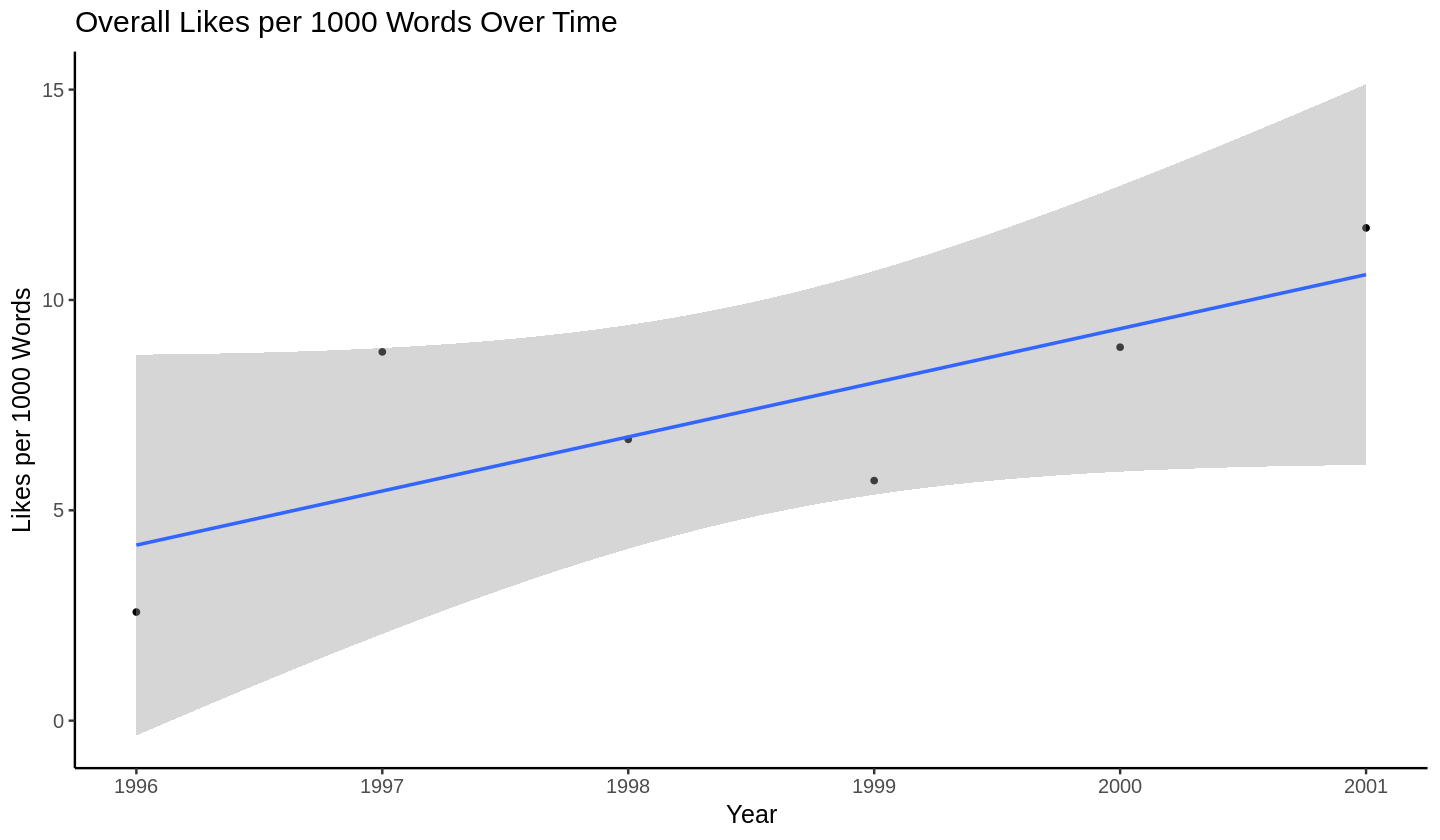

In [ ]:
year_int <- year_dm_count[-7,]
year_int$year<- as.numeric(as.character(year_int$year))
theme_set(theme_classic(base_size = 15))
options(repr.plot.height = 7, repr.plot.width = 12)
ggplot(year_int,aes(x=year,y=per_thou_year))+
  geom_point()+
  labs(x = "Year", y= "Likes per 1000 Words", title ="Overall Likes per 1000 Words Over Time")+
  stat_smooth(method=lm)


In [ ]:
year_toadd <- year_dm_count[-7,]
by_part2 <- by_part%>% right_join(year_toadd, by = "year")%>%
  rename("cm_total" = "cm.y")%>%
  rename("ci_total" = "ci.y")%>%
  rename("cf_total" = "cf.y")%>%
  rename("v_total" = "v.y")%>%
  rename("nc_total" = "nc.y")%>%
  rename("x_total" = "x.y")%>%
  rename("cm" = "cm.x")%>%
  rename("cf" = "cf.x")%>%
  rename("ci" = "ci.x")%>%
  rename("nc" = "nc.x")%>%
  rename("v" = "v.x")%>%
  rename("x" = "x.x")

In [ ]:
by_part2 <- by_part2%>% group_by(year)%>%
  mutate(year_avg= mean(per_thou))%>%
  mutate(stdev= sd(per_thou))

In [ ]:
by_dm<-by_part2%>%subset(select= -c(x_total,nc_total,total_like_year,v_total,cm_total,ci_total,cf_total,year_total,per_thou_year,year_avg,stdev))
dm2<-data.frame(by_dm)

In [ ]:
by_dm <- by_dm%>%mutate(pt_cm = (cm/likes)*100)%>%
  mutate(pt_cf = (cf/likes)*100)%>%
  mutate(pt_ci = (ci/likes)*100)%>%
  mutate(pt_nc = (nc/likes)*100)%>%
  mutate(pt_v = (v/likes)*100)

In [ ]:
by_dm<-by_dm%>%filter(pt_cf != 100)%>%
  filter(pt_cm != 100)%>%
  filter(pt_nc != 100)%>%
  filter(pt_v != 100)%>%
  filter(pt_ci != 100)

In [ ]:
by_dm_med <- by_dm%>% group_by(year)%>%
  mutate(cm= mean(pt_cm))%>%
  mutate(ci= mean(pt_ci))%>%
  mutate(cf= mean(pt_cf))%>%
  mutate(nc= mean(pt_nc))%>%
  mutate(v= mean(pt_v))
by_dm_std <- by_dm%>% group_by(year)%>%
  mutate(cf= sd(pt_cf))%>%
  mutate(nc= sd(pt_nc))%>%
  mutate(cm= sd(pt_cm))%>%
  mutate(ci= sd(pt_ci))%>%
  mutate(v= sd(pt_v))

In [ ]:
dm_med<-unique(by_dm_med[c("year","cm","ci","cf","nc","v")])
dm_std<-unique(by_dm_std[c("year","cm","ci","cf","nc","v")])

In [ ]:
dmmed <- dm_med%>% pivot_longer(col=c("cm","ci","cf","nc","v"), names_to= "dm_med",values_to="year_dm_med")%>%
  subset(select=c(year,dm_med,year_dm_med))
dmstd<- dm_std%>% pivot_longer(col=c("cm","ci","cf","nc","v"), names_to= "dm_st",values_to="year_dm_stdev")%>%
  subset(select=c(year,dm_st,year_dm_stdev))

In [ ]:
dms <- full_join(dmmed,dmstd, by = c("year"="year",'dm_med' = 'dm_st'))

`geom_smooth()` using formula = 'y ~ x'


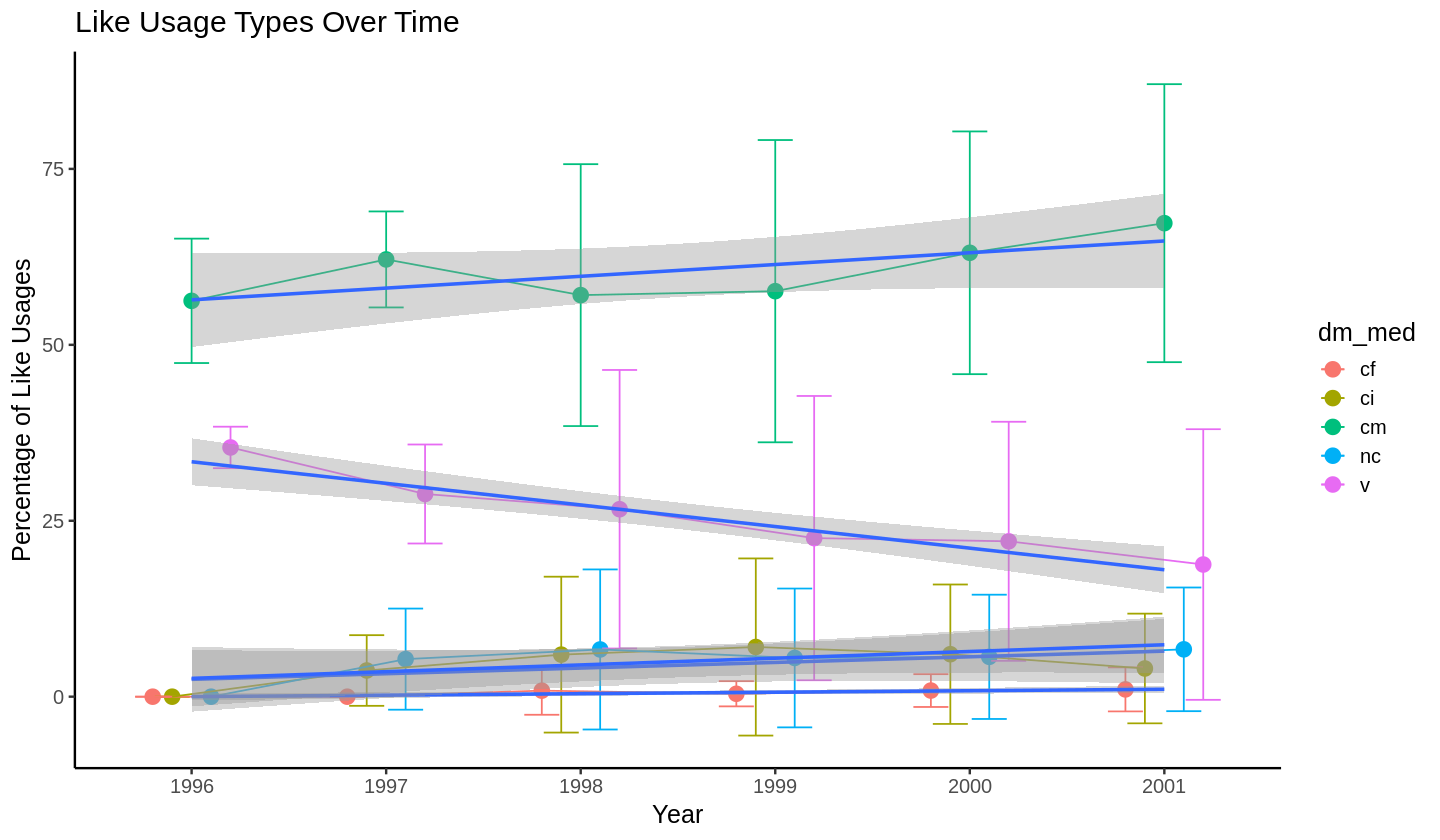

In [ ]:
ggplot(dms,aes(x=year,y=year_dm_med,group = dm_med))+
  geom_point(aes(color = dm_med),size = 4,position =  position_dodge(width = 0.5))+
  geom_errorbar(aes(ymin=year_dm_med-year_dm_stdev,ymax=year_dm_med+year_dm_stdev,color = dm_med),position =  position_dodge(width = 0.5))+
  geom_line(aes(color = dm_med),position = position_dodge(width = 0.5))+
  stat_smooth(method=lm)+
  labs(x = "Year", y= "Percentage of Like Usages", title ="Like Usage Types Over Time")

In [ ]:
dm3<-dm2%>% mutate(pt_cm = (cm/likes)*100)%>%
  mutate(pt_cf = (cf/likes)*100)%>%
  mutate(pt_ci = (ci/likes)*100)%>%
  mutate(pt_nc = (nc/likes)*100)%>%
  mutate(pt_v = (v/likes)*100)
dm3<-dm3%>%filter(pt_cf != 100)%>%
  filter(pt_cm != 100)%>%
  filter(pt_nc != 100)%>%
  filter(pt_v != 100)%>%
  filter(pt_ci != 100)

In [ ]:
dm3<-dm3%>%pivot_longer(col=c("pt_cm","pt_ci","pt_cf","pt_nc","pt_v"), names_to= "dm_type",values_to="pt_dm")

`geom_smooth()` using formula = 'y ~ x'


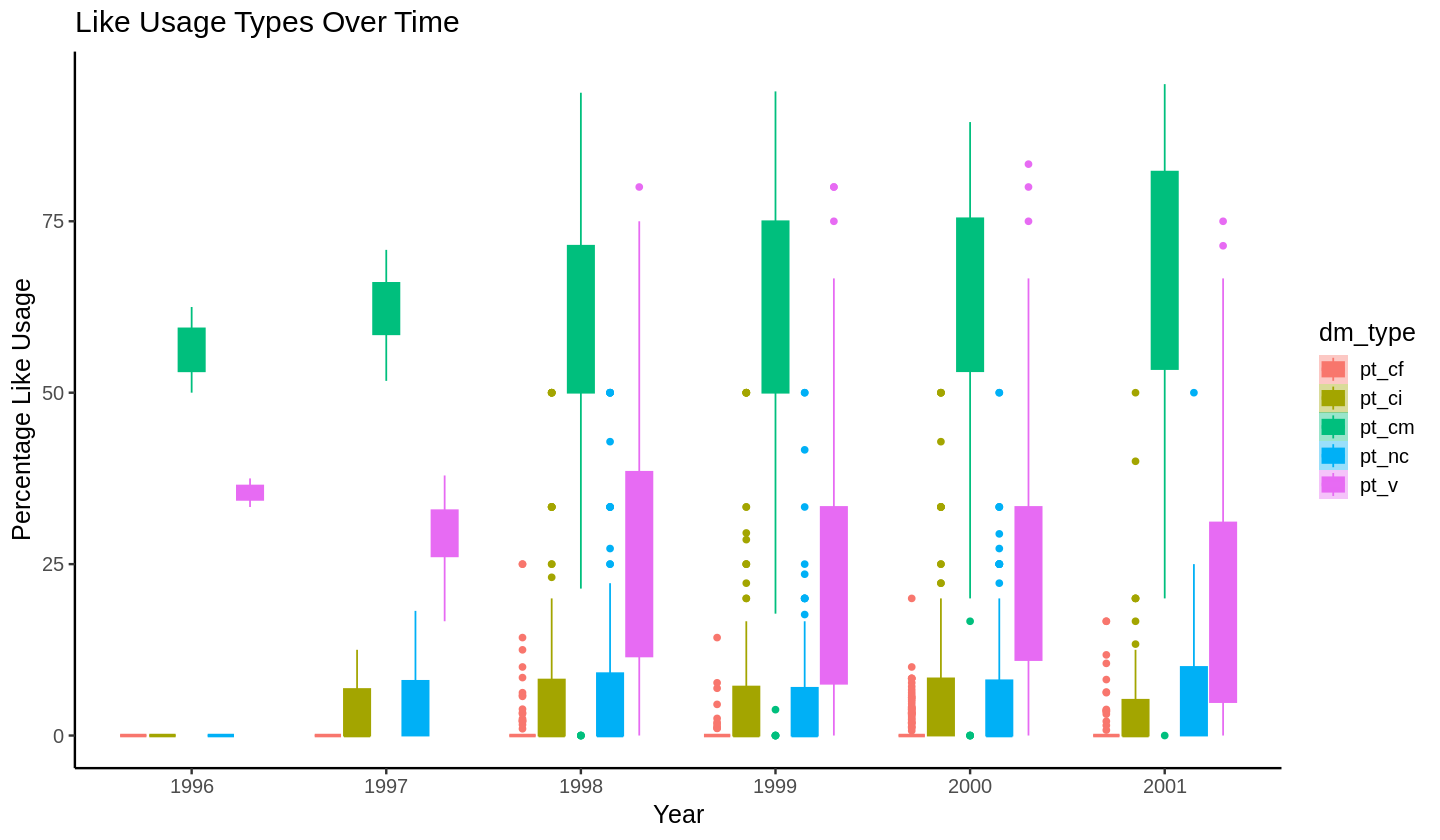

In [ ]:
ggplot(dm3,aes(x=year,y=pt_dm,fill=dm_type))+
  geom_boxplot(aes(color = dm_type))+
  stat_smooth(method = lm,aes(color = dm_type))+
  labs(x = "Year", y= "Percentage Like Usage", title ="Like Usage Types Over Time")

`geom_smooth()` using formula = 'y ~ x'


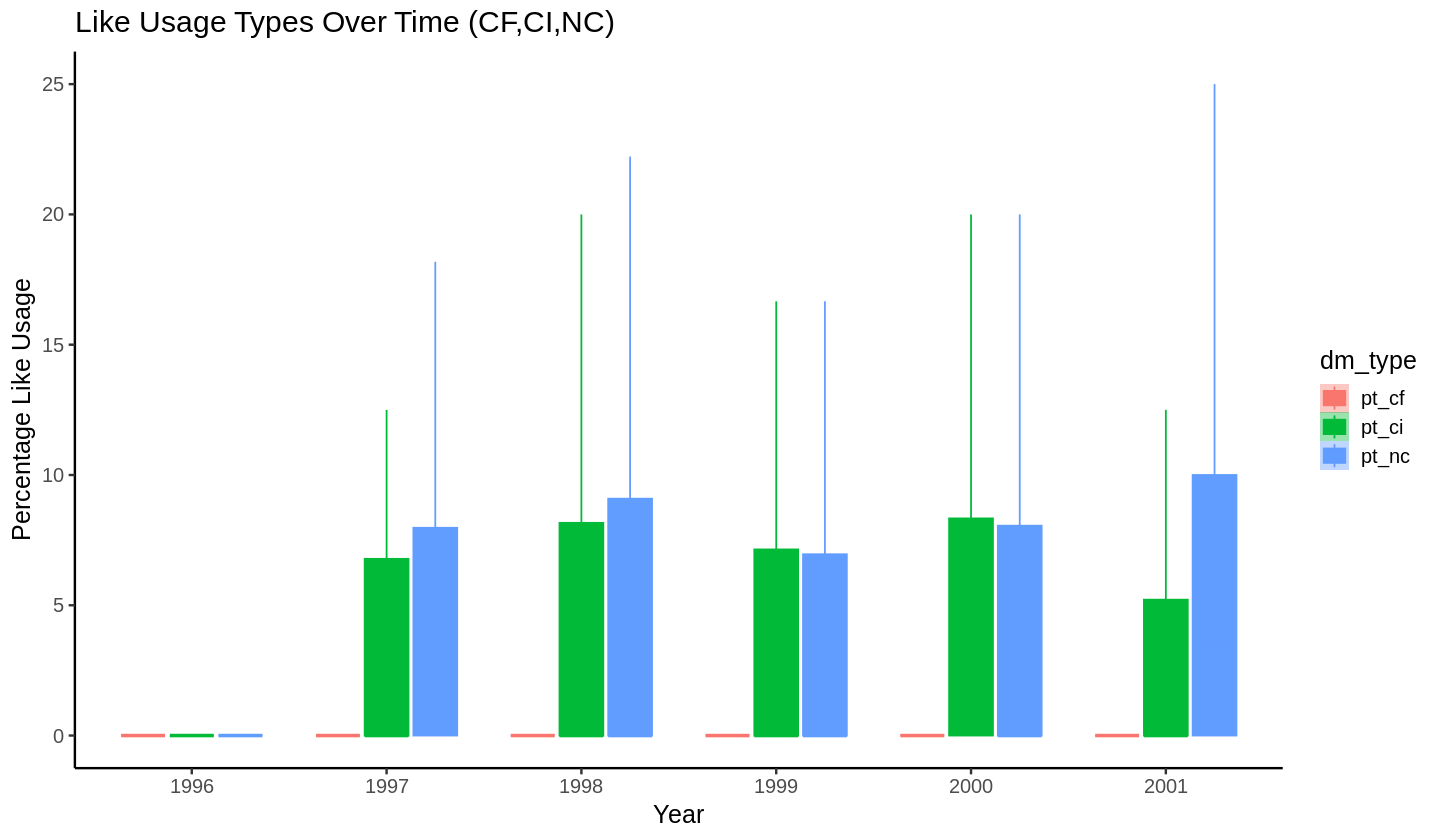

In [ ]:
dm4<-dm3%>%filter(dm_type != "pt_v" & dm_type != "pt_cm")
ggplot(dm4,aes(x=year,y=pt_dm,fill=dm_type))+
  geom_boxplot(aes(color = dm_type),outlier.shape =NA)+
  stat_smooth(method = lm,aes(color = dm_type))+
  coord_cartesian(ylim=c(0, 25))+
  labs(x = "Year", y= "Percentage Like Usage", title ="Like Usage Types Over Time (CF,CI,NC)")

`geom_smooth()` using formula = 'y ~ x'


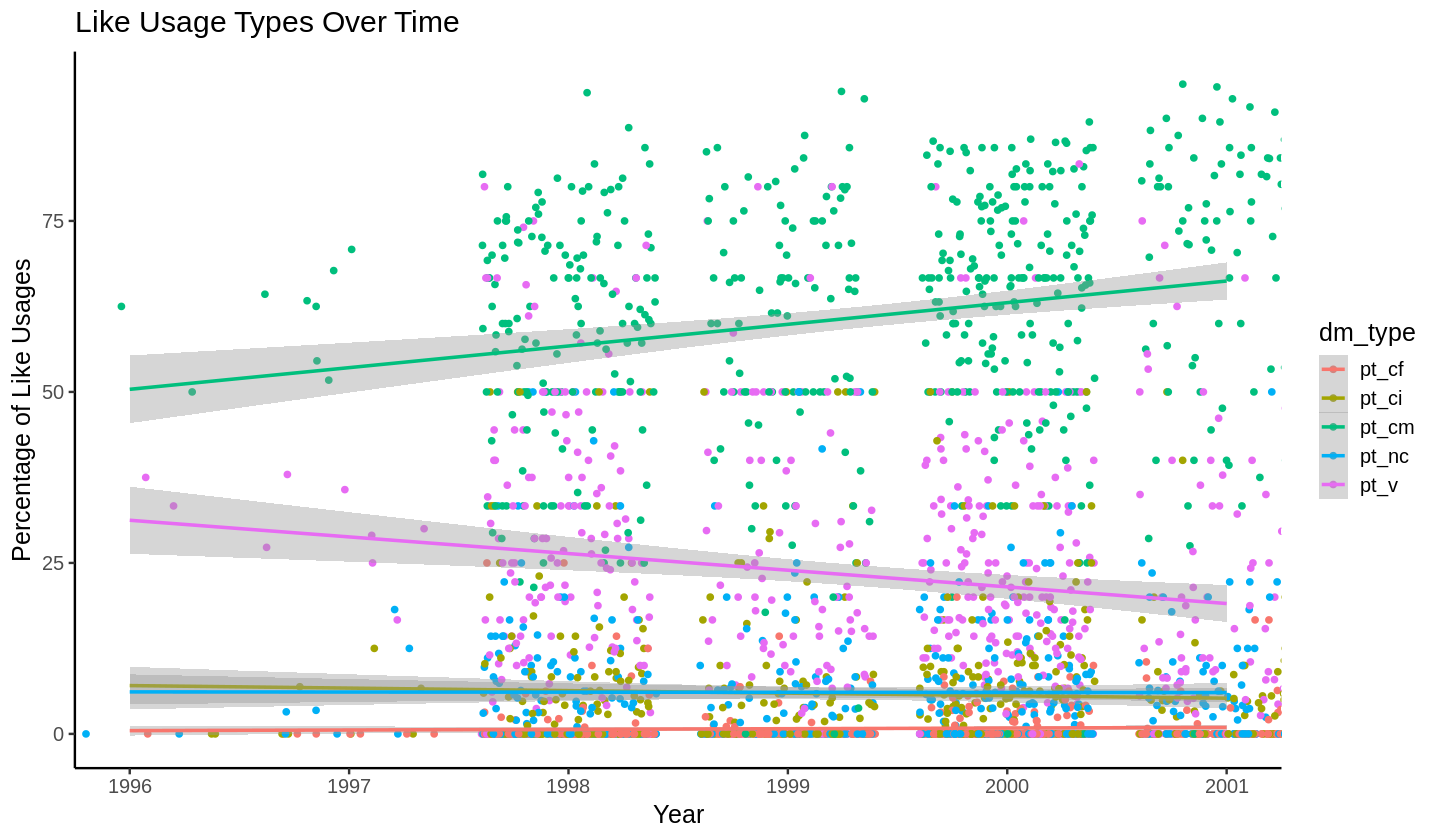

In [ ]:
dm4<- dm3%>%subset(select = c(year,dm_type,pt_dm))
dm4$year<- as.numeric(as.character(dm4$year))

ggplot(dm4,aes(x=year,y=pt_dm,color = dm_type))+
  geom_point(position =  position_jitter())+
  stat_smooth(method=lm)+
  coord_cartesian(xlim=c(1996, 2001))+
  labs(x = "Year", y= "Percentage of Like Usages", title ="Like Usage Types Over Time")

`geom_smooth()` using formula = 'y ~ x'


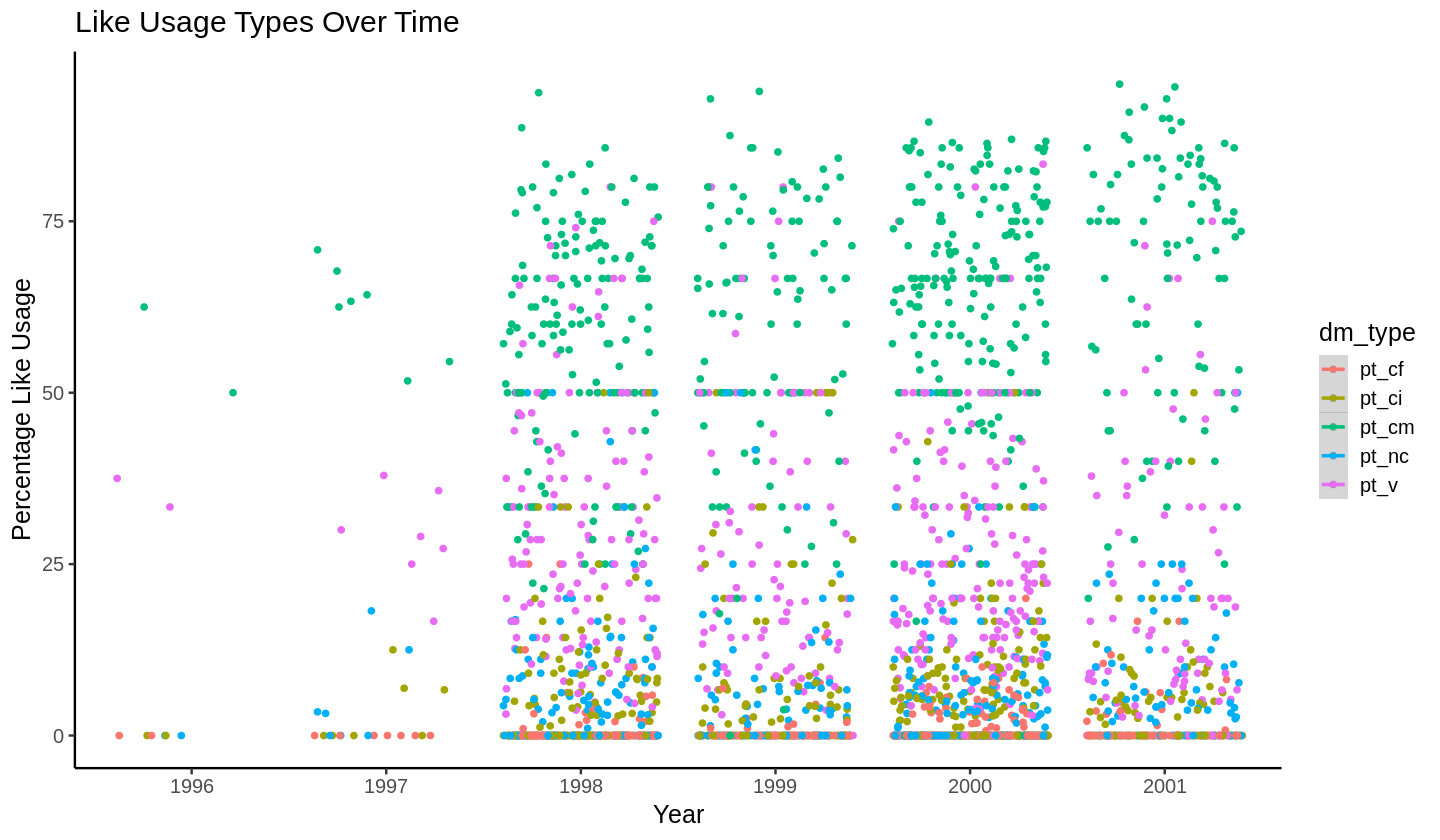

In [ ]:
ggplot(dm3,aes(x=year,y=pt_dm,color=dm_type))+
  geom_point(position = position_jitter())+
  stat_smooth(method = lm,aes(color = dm_type))+
  labs(x = "Year", y= "Percentage Like Usage", title ="Like Usage Types Over Time")

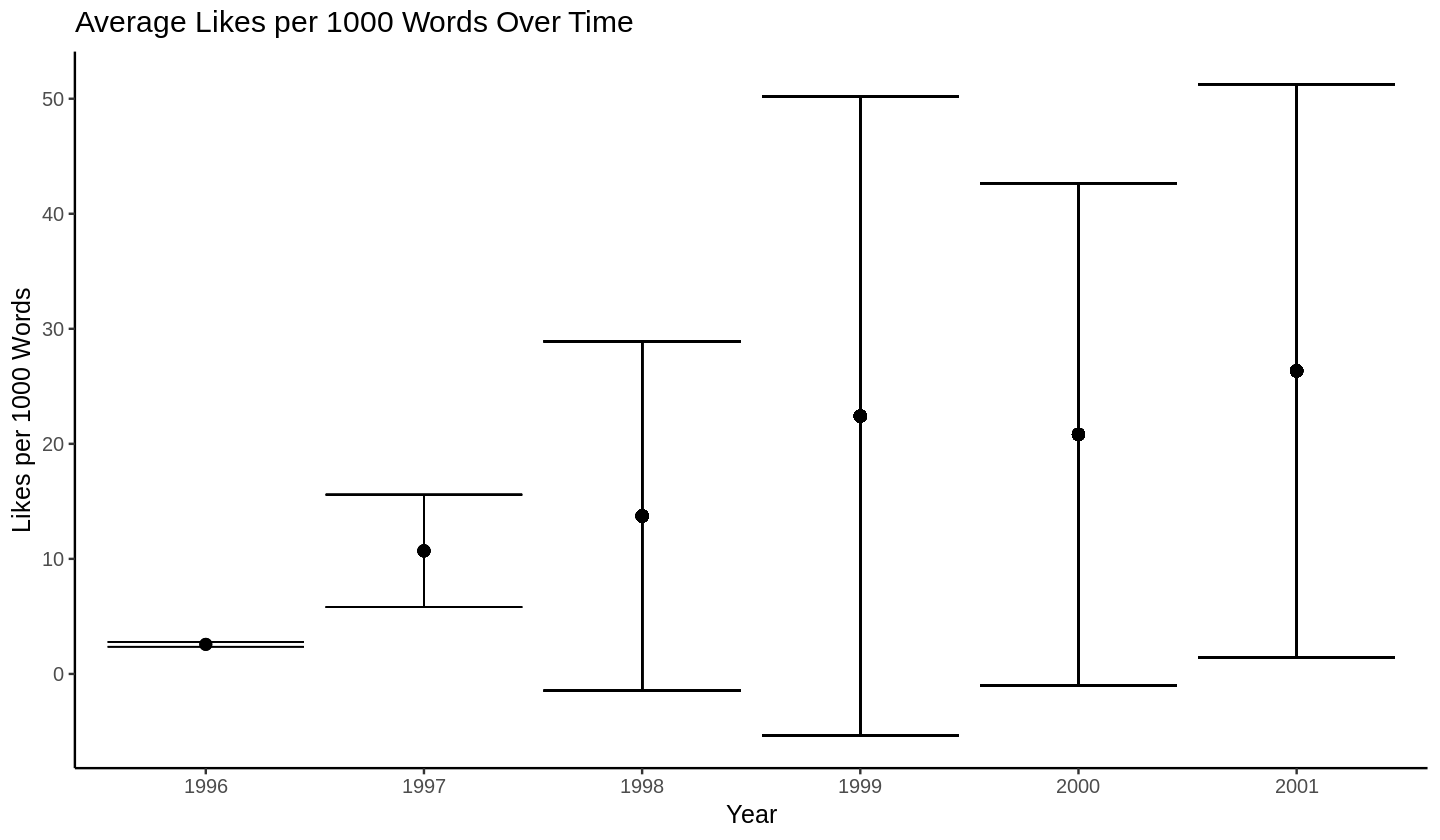

In [ ]:
ggplot(by_part2,aes(x=year,y=year_avg))+
  geom_line()+
  geom_point(size=3)+
  geom_errorbar(aes(ymin=year_avg-stdev,ymax=year_avg+stdev))+
  labs(x = "Year", y= "Likes per 1000 Words", title ="Average Likes per 1000 Words Over Time")

In [ ]:
by_part3 <- by_part2%>% group_by(Speaker.gender, .add = TRUE )%>%
  mutate(year_median_gender= median(per_thou))%>%
  mutate(stdev_gen= sd(per_thou))

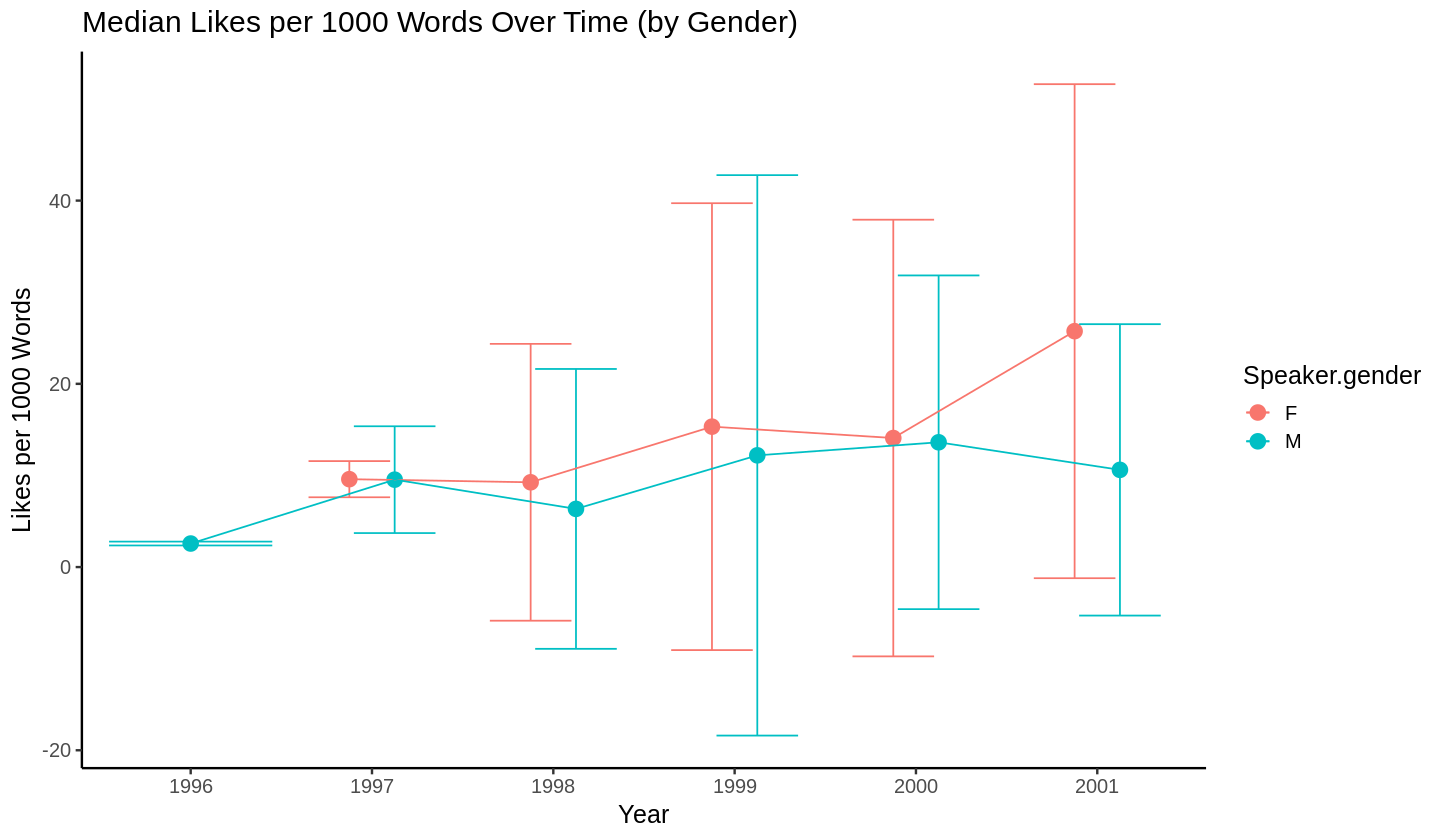

In [ ]:
by_part4<- unique(by_part3[c("year","Speaker.gender","year_median_gender","stdev_gen")])
by_part4 <- by_part4%>% filter(Speaker.gender != "U")
ggplot(by_part4,aes(x=year,y=year_median_gender,group = Speaker.gender))+
  geom_point(aes(color = Speaker.gender),size = 4,position =  position_dodge(width = 0.5))+
  geom_errorbar(aes(ymin=year_median_gender-stdev_gen,ymax=year_median_gender+stdev_gen,color = Speaker.gender),position =  position_dodge(width = 0.5))+
  geom_line(aes(color = Speaker.gender),position = position_dodge(width = 0.5))+
  labs(x = "Year", y= "Likes per 1000 Words", title ="Median Likes per 1000 Words Over Time (by Gender)")

In [ ]:
by_part5 <- by_part%>% group_by(age)%>%
  mutate(age_med= median(per_thou))%>%
  mutate(stdev= sd(per_thou))

In [ ]:
by_part5 <- by_part5%>% group_by(Speaker.gender,.add = TRUE)%>%
  mutate(age_gen_med= median(per_thou))%>%
  mutate(stdev_gen= sd(per_thou))

age,Speaker.gender,year,age_gen_med,stdev_gen,age_med,stdev
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
60,F,1998,3.759647,4.020284,3.216173,3.511439
20,F,1998,22.203947,25.383099,20.222854,25.268912
20,M,1998,19.169329,24.967706,20.222854,25.268912
36,F,1998,3.765227,5.137980,3.610108,5.484127
27,M,2000,6.637168,9.686676,6.451613,9.180392
24,M,2000,12.048193,18.698871,13.693620,15.653189


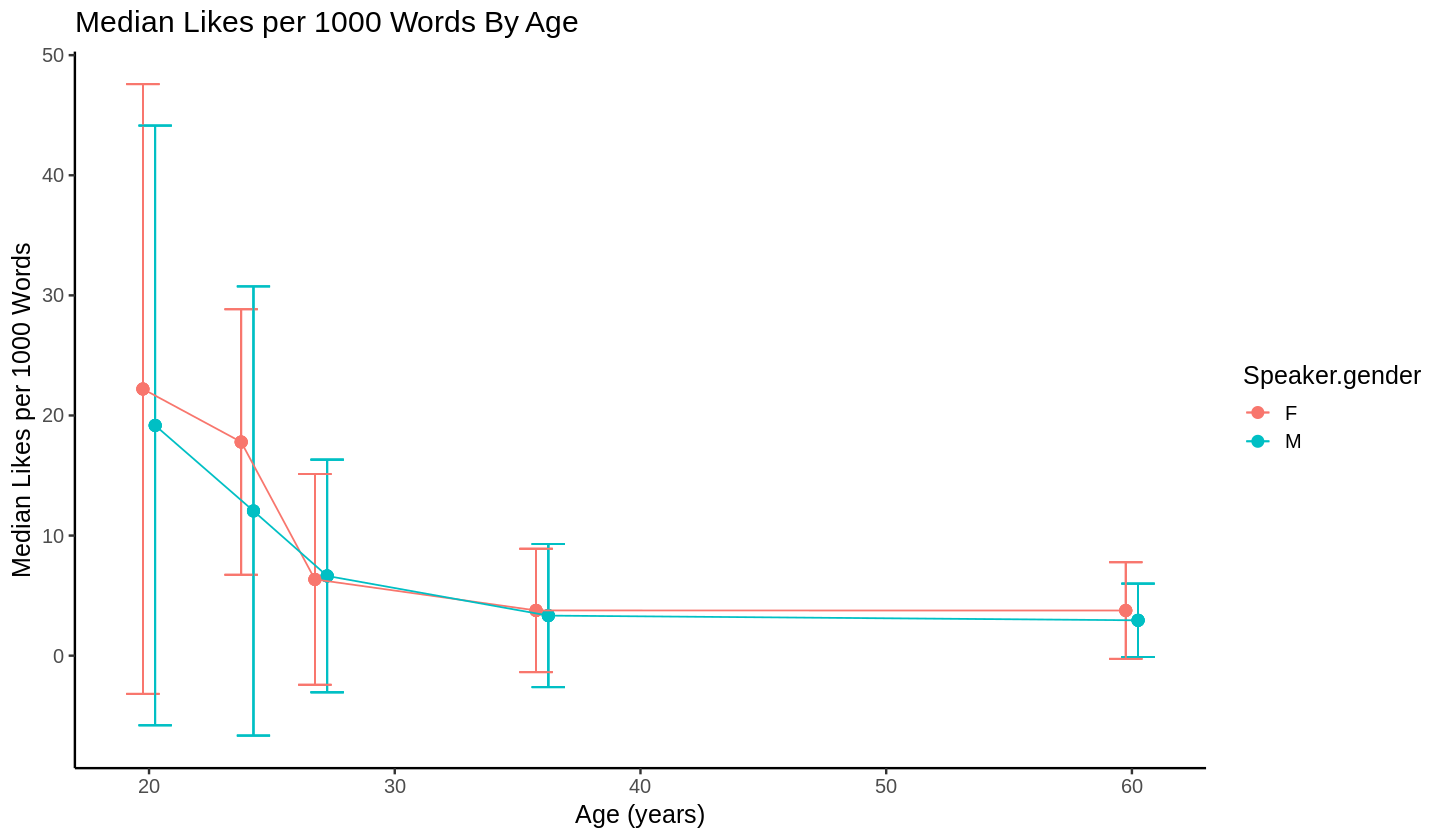

In [ ]:
by_part6<- unique(by_part5[c("age","Speaker.gender","year","age_gen_med","stdev_gen","age_med","stdev")])

by_part6 <- by_part6%>% filter(Speaker.gender != "U")
ggplot(by_part6,aes(x=age,y=age_gen_med,group = Speaker.gender))+
  geom_point(aes(color = Speaker.gender),size = 3,position =  position_dodge(width = 1))+
  geom_errorbar(aes(ymin=age_gen_med-stdev_gen,ymax=age_gen_med+stdev_gen,color = Speaker.gender),position =  position_dodge(width = 1))+
  geom_line(aes(color = Speaker.gender),position =  position_dodge(width = 1))+
  labs(x = "Age (years)", y= "Median Likes per 1000 Words", title ="Median Likes per 1000 Words By Age")

In [ ]:
by_part<-by_part%>%
  mutate(real_likes = sum(cm,cf,ci,nc))

In [ ]:
  by_party<-by_part%>% rowwise(ID)%>%
    mutate(real_likes = sum(cm,cf,ci,nc))%>%
    mutate(rl_per_thou = (real_likes/total)*1000)

In [ ]:
by_partya <- by_party%>% group_by(age)%>%
  mutate(rl_age_med= median(rl_per_thou))%>%
  mutate(rl_stdev= sd(rl_per_thou))%>%
  group_by(Speaker.gender,.add = TRUE)%>%
  mutate(rl_age_gen_med= median(rl_per_thou))%>%
  mutate(rl_stdev_gen= sd(rl_per_thou))%>%
  replace(is.na(.), 0)
by_party1<- unique(by_partya[c("age","Speaker.gender","year","rl_age_gen_med","rl_stdev_gen","rl_age_med","rl_stdev")])

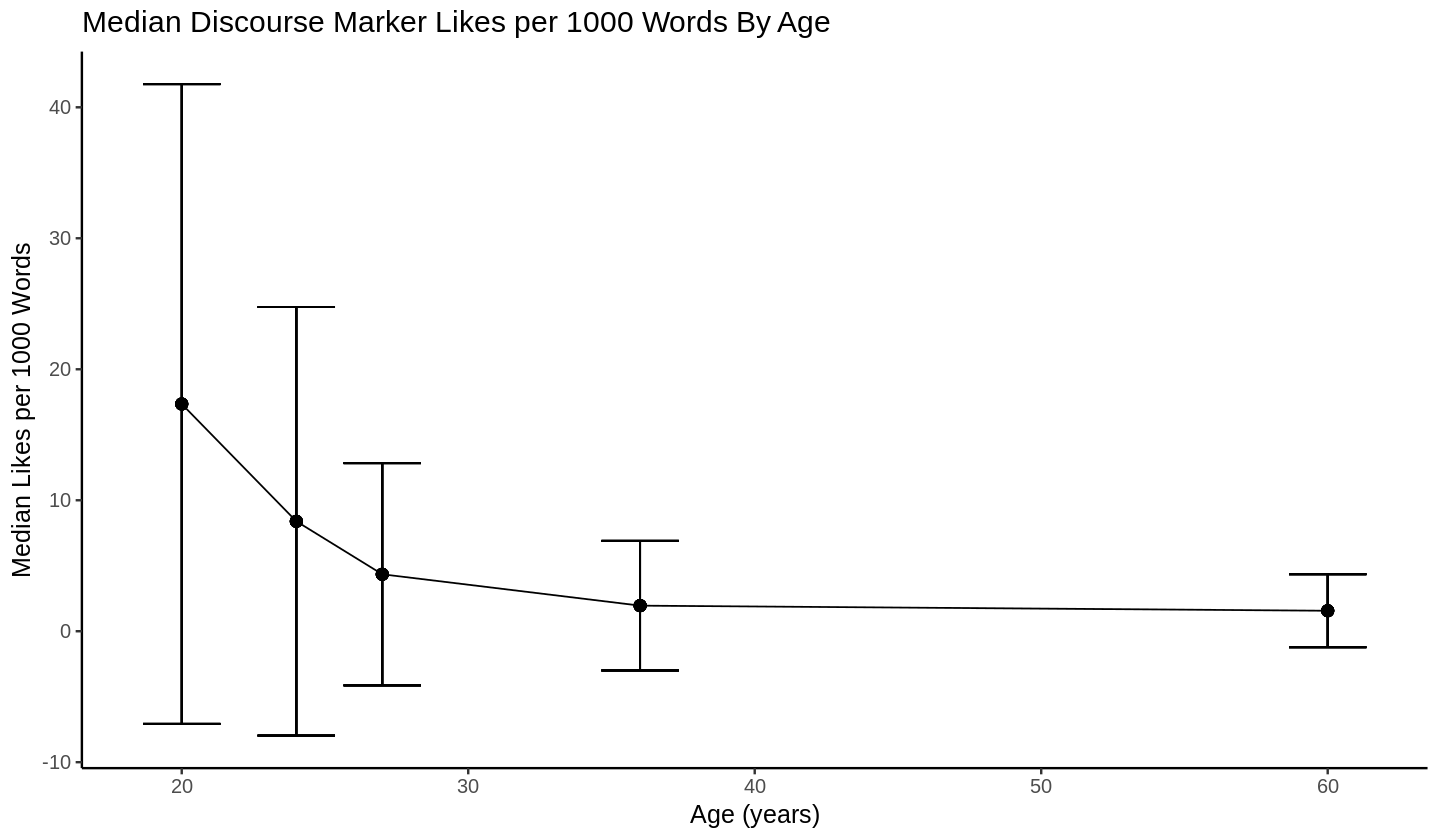

In [ ]:
ggplot(by_party1,aes(x=age,y=rl_age_med))+
  geom_point(size = 3)+
  geom_errorbar(aes(ymin=rl_age_med-rl_stdev,ymax=rl_age_med+rl_stdev))+
  geom_line()+
  labs(x = "Age (years)", y= "Median Likes per 1000 Words", title ="Median Discourse Marker Likes per 1000 Words By Age")

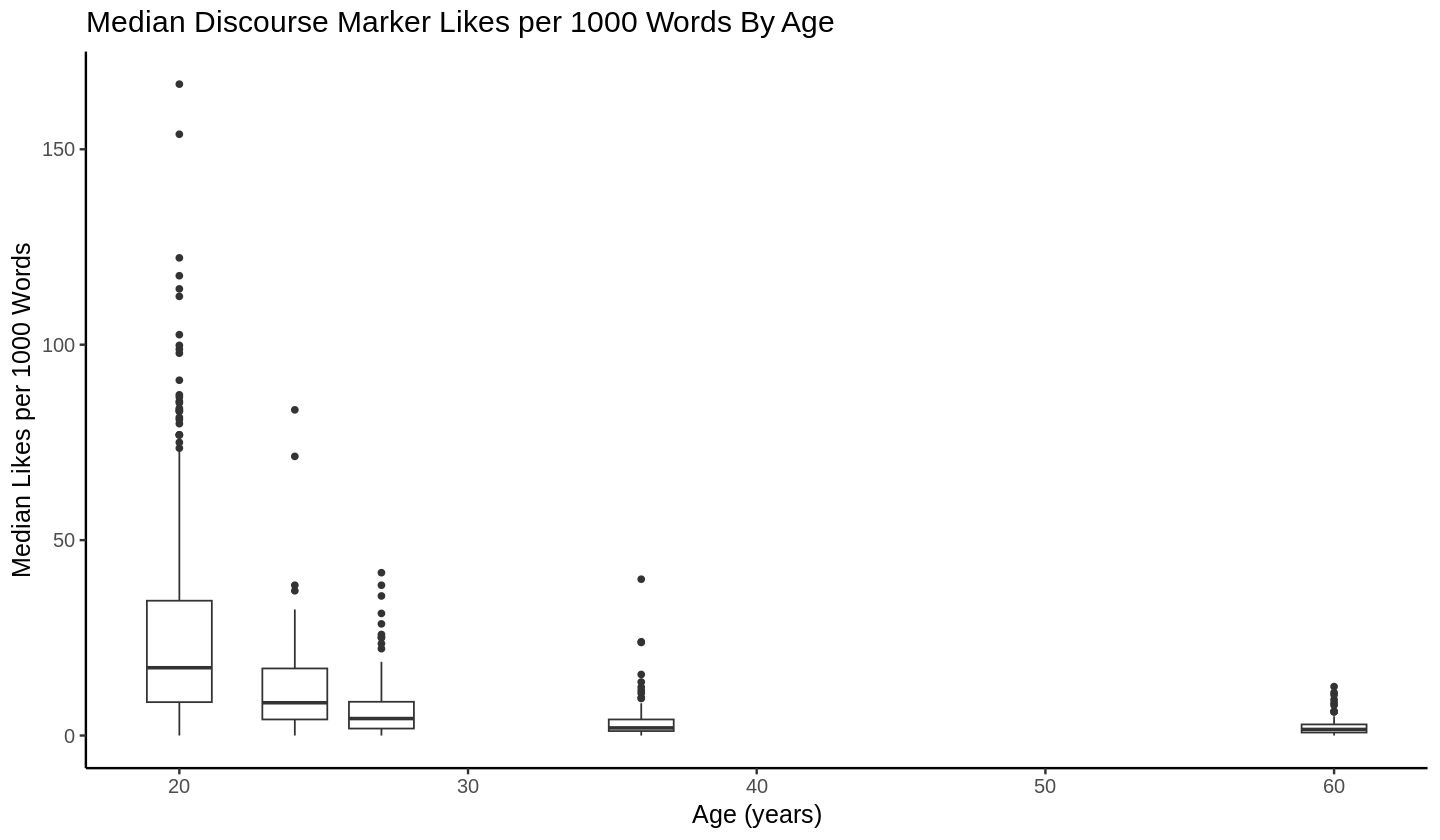

In [ ]:
ggplot(by_party,aes(x=age,y=rl_per_thou, group = age))+
  geom_boxplot()+
  labs(x = "Age (years)", y= "Median Likes per 1000 Words", title ="Median Discourse Marker Likes per 1000 Words By Age")